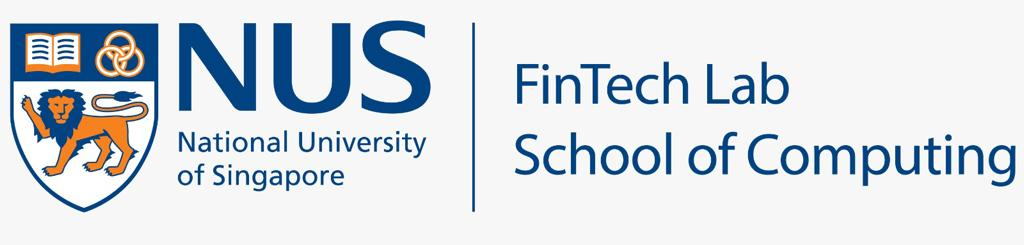

---

<font size="8">**IS5006 - Intelligent systems Fuzzy Logic in Python**</font>

Fill in your details

Name : Shubhankar Agrawal

Student Id : A0248330L

# Objective

To understand fuzzy logic and implement it

# To Find grade of the cryptocurrency

## Installs and Imports

In this case, scikit-fuzzy already contained both skfuzzy and numpy. But, in the case it is not, more than one library will have to be installed 

In [113]:
#Install scikit-fuzzy
!pip install scikit-fuzzy

In [114]:
#Import libraries.
import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

## Input Data

In [115]:
# (crypto name, yearly return in percentage, risk in percentage)
cryptos = [
    ('a', 25, 40), ('b', 40, 12), ('c', 55, 30),('d', 10, 12), ('e', 13, 5), ('f', 12, 4),('g', 23, 56),
('h', 10, 63), ('i', 8, 42),('j', 13, 12), ('k', 51, 14)
]

## Result generation functions

1. Calculate best and worst cryptos
2. List out tabulated cryptos
3. Plot a 3D graph of grade with respect to annual return and risk

In [116]:
# Function to calculate and print the best and worst crypto given a list of tuples (crypto, grade)
def calculate_best_and_worst_cryptos(cryptoGrades):
    bestCrypto = max(cryptoGrades, key = lambda x: x[1])
    worstCrypto = min(cryptoGrades, key = lambda x: x[1])
    print('Best Crypto  : {}, grade {}'.format(bestCrypto[0], bestCrypto[1]))
    print('Worst Crypto : {}, grade {}'.format(worstCrypto[0], worstCrypto[1]))
    print()

In [117]:
# Function to print out tabulated list of cryptos sorted by grade
def list_out_cryptos(cryptos, cryptoGrades):
  cryptoResults = []
  for i in range(len(cryptos)):
    cryptoResults.append(cryptos[i]+(cryptoGrades[i][1],)) 
  cryptoResults.sort(key= lambda x: -x[3])
  # Print tabulated results
  print('{:<6} {:<15} {:<5} {:<20}'.format('Crypto', 'Annual Return', 'Risk', 'Grade'))
  for c in cryptoResults:
    print('{:<6} {:<15} {:<5} {:<20}'.format(c[0], c[1], c[2], c[3]))
  print()
  return cryptoResults

In [118]:
# Function to plot crypto grades
def plot_crypto_grades(cryptoResults):
  # Generate the figure
  fig = plt.figure(figsize=(8, 8))
  ax = plt.axes(projection='3d')
  # List values in required format
  vals = list(zip(*cryptoResults))
  ax.plot3D(vals[2], vals[1], vals[3])
  # Annotate and set labels
  for c in cryptoResults:
    ax.text(c[2], c[1], c[3], c[0])
  ax.set_ylabel('Annual Return')
  ax.set_xlabel('Risk')
  ax.set_zlabel('Grade')
  ax.set_title('Crypto Grades by Yearly Return and Risk')

## Crypto Filter

In [119]:
def cryptoFilter():
    length = len(cryptos)
    i = 0
    cryptoGrades = []
    while i < length:
        crypto, grade = fuzzy_logic(cryptos[i])
        cryptoGrades.append((crypto, grade))
        i += 1
    
    cryptoResults = list_out_cryptos(sorted(cryptos), sorted(cryptoGrades))
    calculate_best_and_worst_cryptos(cryptoGrades)
    plot_crypto_grades(cryptoResults)
    return cryptoGrades

## Fuzzy Logic Implementation

In [120]:
def fuzzy_logic(crypto):
    # New Antecedent/Consequent objects hold universe variables and membership
    # functions

    curYearlyReturn = crypto[1] 
    curRisk = crypto[2]

    # setting the universe set of the input - this number is depending on the requirement/situation
    # in this example, it means that the possible yearly return value is anything from 1 to 20 (percent)
    # the possible risk value is anything from 1 to 15 (percent)
    # the range is inclusive of the first param but up to the second param
    # the third range param is for the 'step' between values ( in example, this is 0,1,2,....)
    yearlyReturn = ctrl.Antecedent(np.arange(0, 61, 1), 'yearlyReturn')
    risk = ctrl.Antecedent(np.arange(0, 81, 1), 'risk')

    # setting the universe set of the output - this number is depending on the requirement/situation
    # in this example, the crypto is graded in anything between 0 to 100
    grade = ctrl.Consequent(np.arange(0, 101, 1), 'grade')

    # Auto-membership function population is possible with .automf(3, 5, or 7)
    # you can try with different value
    # 3, 5, or 7 means the universe set is divided by 3, 5, or 7 categories
    yearlyReturn.automf(3)

    # Custom membership functions can be built interactively with a familiar
    # customize membership plotting
    # the example below is equivalent with automf(3), but you can try play around with the value to change the shape
    # the first parameter is the start point, the second is the peak point, and the third is the end point
    # risk is customized because by default the smaller number is equal worse
    # while with risk the smaller the risk is the better
    risk['good'] = fuzz.trimf(risk.universe, [0, 0, 40])
    risk['average'] = fuzz.trimf(risk.universe, [0, 40, 80])
    risk['poor'] = fuzz.trimf(risk.universe, [40, 80, 80])

    # the .view function will make the diagram pop out for reference.
    # suggested to uncomment the function below in debug mode to see the diagram
    # this is the membership function diagram of the risk input
    # risk.view()

    # Custom membership functions can be built interactively with a familiar
    # customize membership plotting
    # the example below is equivalent with automf(3), but you can try play around with the value to change the shape
    # the first parameter is the start point, the second is the peak point, and the third is the end point
    grade['poor'] = fuzz.trimf(grade.universe, [0, 0, 50])
    grade['average'] = fuzz.trimf(grade.universe, [0, 50, 100])
    grade['good'] = fuzz.trimf(grade.universe, [50, 100, 100])
    # the .view function will make the diagram pop out for reference.
    # suggested to uncomment the function below in debug mode to see the diagram
    # this is the membership function diagram of the output
    # grade.view()

    # these rules are used to map between the input and the output
    # the first param is the requirement, and the second param is the result
    rule1 = ctrl.Rule(yearlyReturn['poor'] | risk['poor'], grade['poor'])
    rule2 = ctrl.Rule(yearlyReturn['average'] & risk['average'], grade['poor'])
    rule3 = ctrl.Rule(yearlyReturn['average'] & risk['good'], grade['average'])
    rule4 = ctrl.Rule(yearlyReturn['good'] & risk['average'], grade['average'])
    rule5 = ctrl.Rule(yearlyReturn['good'] & risk['good'], grade['good'])

    # assign the rules
    investment_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
    investment = ctrl.ControlSystemSimulation(investment_ctrl)

    # Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
    investment.input['yearlyReturn'] = curYearlyReturn
    investment.input['risk'] = curRisk


    # Crunch the numbers
    investment.compute()

    # the .view function will make the diagram pop out for reference.
    # suggested to uncomment the function below in debug mode to see the diagram
    # this is the result diagram
    grade.view(sim=investment)
    # Note: Grade Plots are in alphabetical order of crypto names.

    # this result is a crisp, de-fuzzified number
    # this is gotten from fuzzifying the input, then mapping it to the output, and de-fuzzifying the result
    tempGrade = investment.output['grade']


    return (crypto[0], tempGrade)

Crypto Annual Return   Risk  Grade               
k      51              14    57.49560246262095   
c      55              30    50.79009791285078   
b      40              12    50.4503559637972    
e      13              5     42.24244910924641   
j      13              12    42.24244910924641   
f      12              4     41.21951219512202   
d      10              12    38.88857779555456   
g      23              56    18.571428571428573  
h      10              63    18.055555555555554  
i      8               42    17.602339181286546  
a      25              40    17.06349206349206   

Best Crypto  : k, grade 57.49560246262095
Worst Crypto : a, grade 17.06349206349206



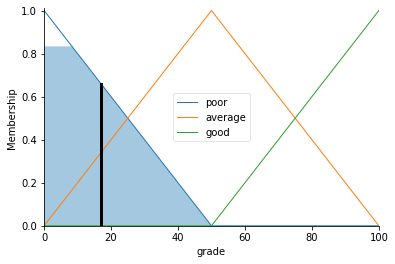

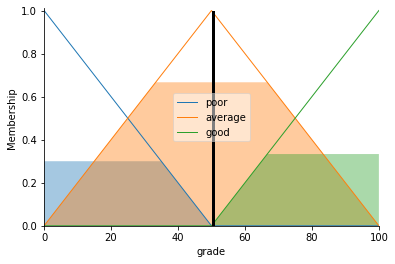

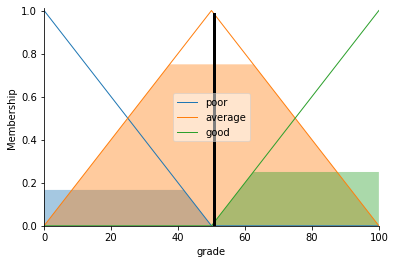

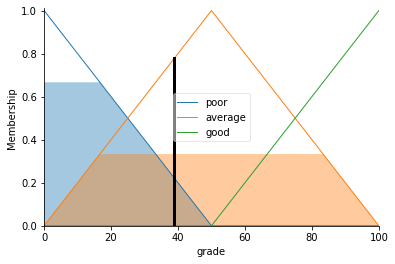

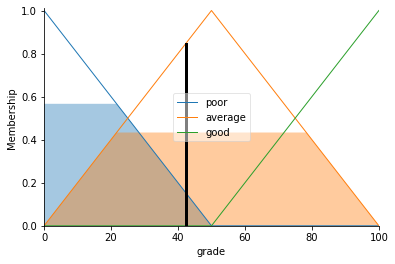

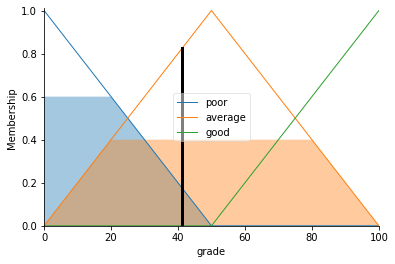

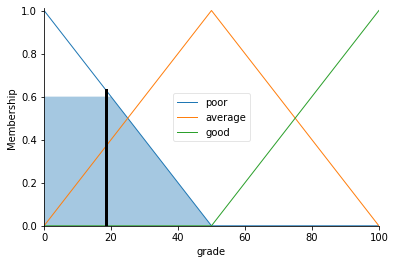

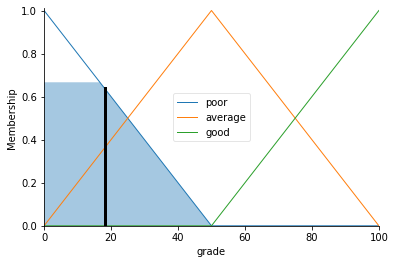

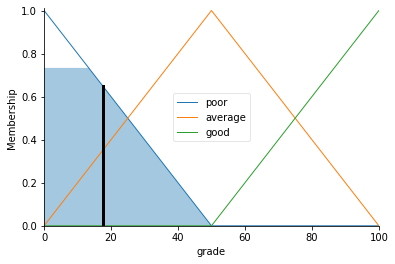

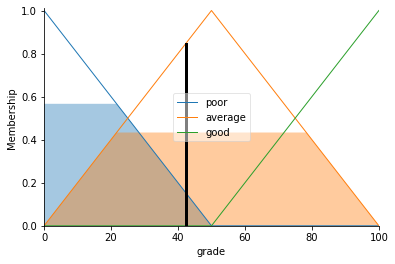

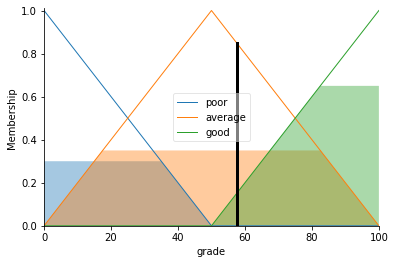

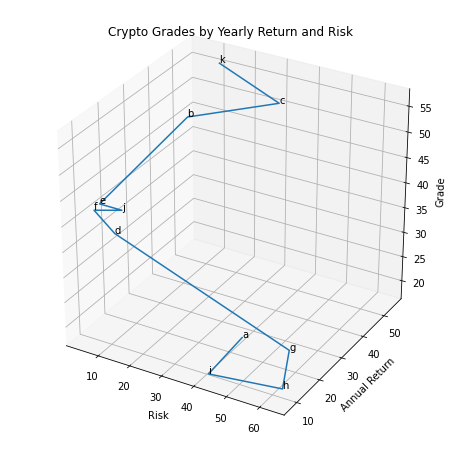

In [122]:
#run cryptos
if __name__ == '__main__':
    cryptoGrades = cryptoFilter()